Текущий LTV юзера: 2.02
LTV на полгода: nan


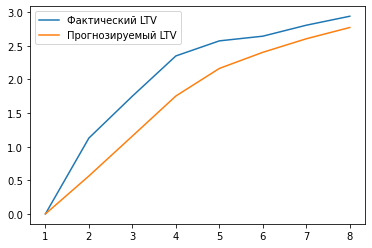

ROMI на 4 недели: -1.0
ROMI на полгода: -1.0


In [1]:
import pandas as pd
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt

# загружаем данные
df = pd.read_excel(r'C:\Users\Oleksii Cherkaskyi\OneDrive\Desktop\test case data analyst.xlsx')

# преобразовываем данные
df['purchase_date'] = pd.to_datetime(df['purchase_date'])
df['week'] = df['purchase_date'].dt.to_period('W')
df['purchase_date'].dt.isocalendar()
df['num_week'] = df['purchase_date'].dt.isocalendar().week

# размер когорт
cohort_sizes = df.groupby('week')['user_id'].nunique()

# выручка по когортам
df['revenue'] = df['is_trial_period'].apply(lambda x: 0 if x == True else 4.99)

cohorts = df.groupby(['week', 'purchase_date', 'num_week'])['revenue'].sum().reset_index()

# обьединяем таблицы
cohorts = cohorts.merge(cohort_sizes, on='week')
cohorts.rename(columns={'user_id': 'cohort_size'}, inplace=True)

# возраст когорт в неделях
cohorts['purchase_date'] = cohorts['purchase_date'].dt.to_period('W')
cohorts['age_week'] = (cohorts['purchase_date'] - cohorts['week']).apply(lambda x: x.n)

# LTV
cohorts['ltv'] = cohorts['revenue'] / cohorts['cohort_size']

# Рассчитываем текущий LTV
current_ltv = cohorts.groupby('week')['ltv'].sum().mean()
print(f'Текущий LTV юзера: {current_ltv:.2f}')

# Рассчитываем LTV на полгода
ltv_forecast = cohorts.groupby('week')['ltv'].sum().rolling(26).mean().dropna().mean()
print(f'LTV на полгода: {ltv_forecast:.2f}')

# Строим графики фактического и прогнозируемого LTV
data = cohorts.groupby(['week', 'num_week'])['ltv'].sum().reset_index()
alpha = 0.5
ltv_smooth = [data['ltv'][0]]
for i in range(1, len(data)):
    ltv_smooth.append(alpha * ltv_smooth[i - 1] + (1 - alpha) * data['ltv'][i])
data['ltv_smooth'] = ltv_smooth
plt.plot(data['num_week'], data['ltv'], label='Фактический LTV')
plt.plot(data['num_week'], data['ltv_smooth'], label='Прогнозируемый LTV')
plt.legend()
plt.show()
# define start and end dates
start_date_4weeks = pd.to_datetime('2022-01-01')
end_date_4weeks = pd.to_datetime('2022-01-28')
start_date_6months = pd.to_datetime('2022-01-01')
end_date_6months = pd.to_datetime('2022-06-30')
#ROMI на 4 недели
cost_per_user = 6
paid_users_4weeks = df[(df['purchase_date'] >= start_date_4weeks) & (df['purchase_date'] <= end_date_4weeks) & (df['is_trial_period'] == False)]['user_id'].nunique()
roi_4weeks = (paid_users_4weeks * 4.99 - cost_per_user * df['user_id'].nunique()) / (cost_per_user * df['user_id'].nunique())
print("ROMI на 4 недели:", roi_4weeks)

#ROMI на полгода
paid_users_6months = df[(df['purchase_date'] >= start_date_6months) & (df['purchase_date'] <= end_date_6months) & (df['is_trial_period'] == False)]['user_id'].nunique()
roi_6months = (paid_users_6months * 4.99 - cost_per_user * df['user_id'].nunique()) / (cost_per_user * df['user_id'].nunique())
print("ROMI на полгода:", roi_6months)